# Homework 3 

# Задача №1 - Лес или пустыня?

Часто при анализе изображений местности необходимо понять ее характер. В частности, если определить, что на изображении преобладет вода, то имеет смысл искать корабли на таком изображении. Если на картинке густой лес, то, возможно, это не лучшая зона для посадки дрона или беспилотника.

Ваша задача - написать программу, которая будет отличать лес от пустыни. В приложении можно найти реальные спутниковые снимки лесов и пустынь.

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/nmHHctW/test_image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/dM77C4b/test_image_06.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [34]:
import numpy as np
import cv2 
import skimage.exposure
import skimage.io
import matplotlib.pyplot as plt
from pathlib import Path
import os
import math

plt.style.use('seaborn')
%matplotlib inline

In [359]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))
    
    axs.imshow(image)
    #axs.grid(color='blue')
    #axs.axis('off')
    plt.plot()
    plt.show()

In [175]:
def tree_or_desert(image: np.ndarray) -> bool:
    desert = np.array([False, False, False])
    
    for i in range(3):
        hist = cv2.calcHist([image], [i], None, [256], [0,255])
        hist = hist.T
        mid = hist.sum(1)/(hist!=0).sum(1).astype(float)
        length = [0,0]
        for j in range(hist.shape[1]):

            if (hist[0][j] >= mid) and (length[0] == 0):
                length[0] = j
            elif hist[0][j] >= mid and length[0] != 0:
                length[1] = j
        if i == 0 and length[0] >= 40 and length[1] <=250:
            desert[0] = True
        elif i == 1 and length[0] >= 50 and length[1] <=200:
            desert[1] = True
        elif i == 2 and length[0] >= 60 and length[1] <=225:
            desert[2] = True
    return np.count_nonzero(desert)>1
  

In [176]:
#image = cv2.imread("desert_forest/test_image_04.jpg")
#tree_or_desert(image)

test_image_00.jpg  is forest


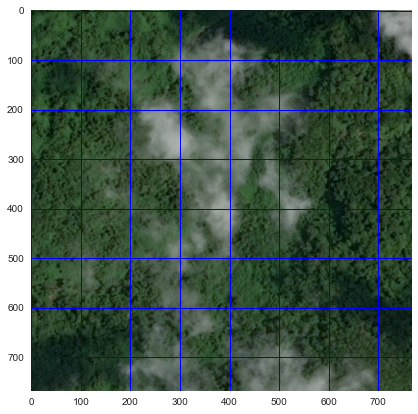

test_image_01.jpg  is forest


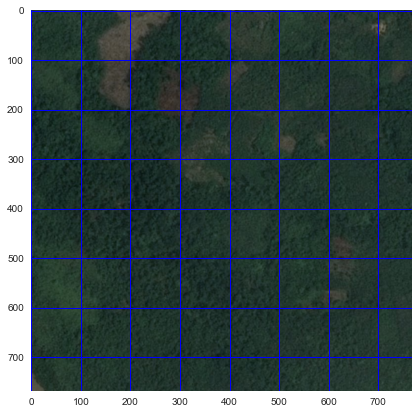

test_image_02.jpg  is forest


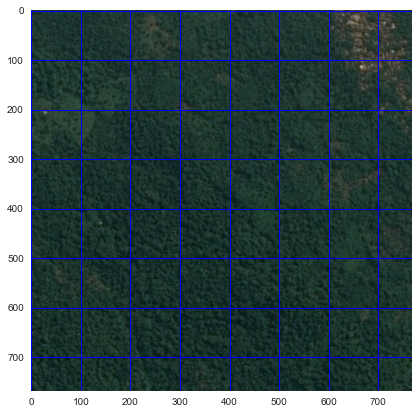

test_image_03.jpg  is forest


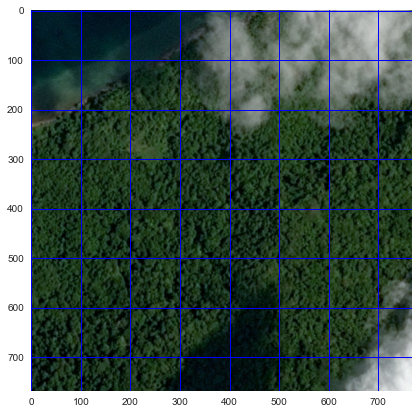

test_image_04.jpg  is desert


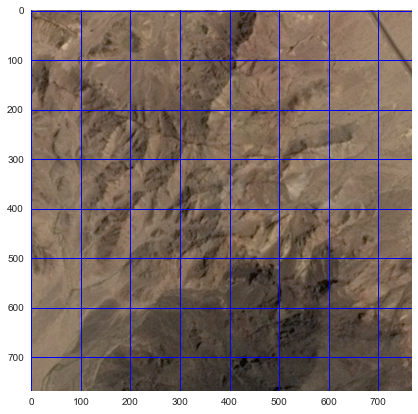

test_image_05.jpg  is forest


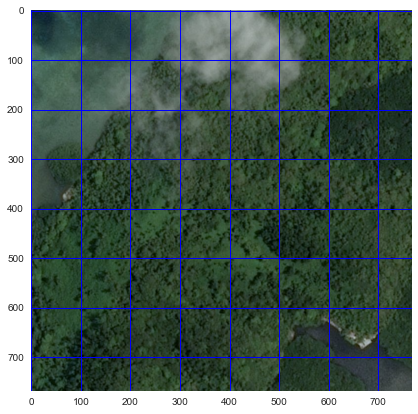

test_image_06.jpg  is desert


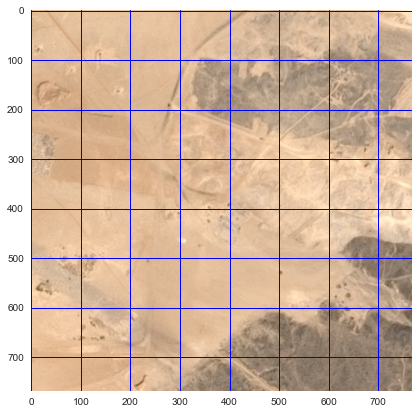

test_image_07.jpg  is forest


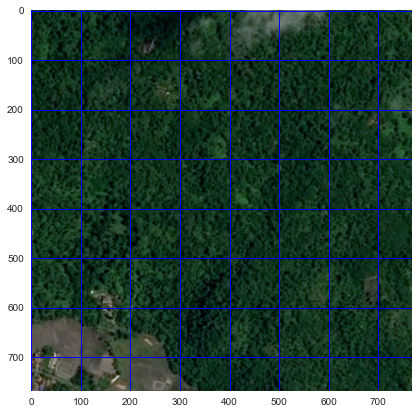

test_image_08.jpg  is forest


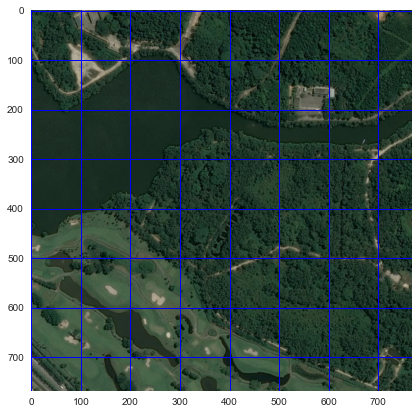

test_image_09.jpg  is forest


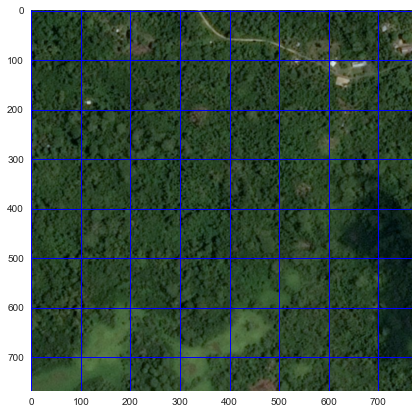

test_image_10.jpg  is desert


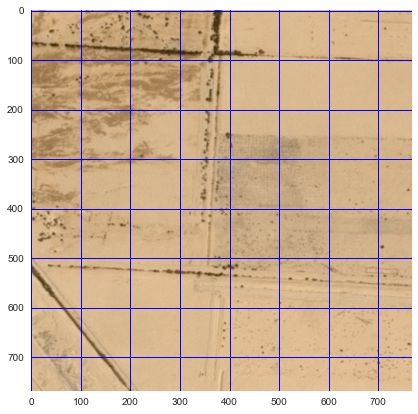

test_image_11.jpg  is desert


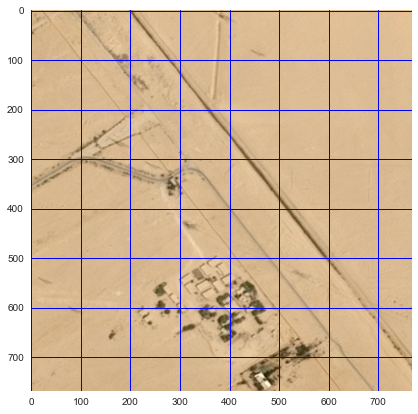

test_image_12.jpg  is desert


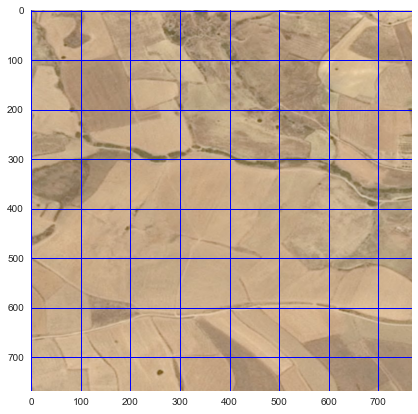

test_image_13.jpg  is desert


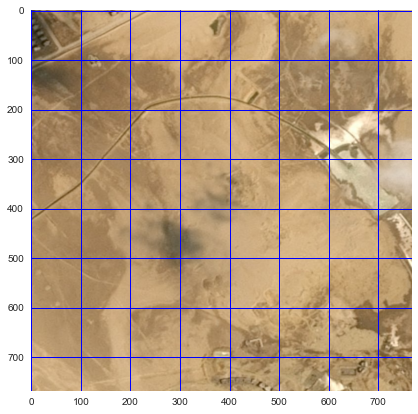

test_image_14.jpg  is desert


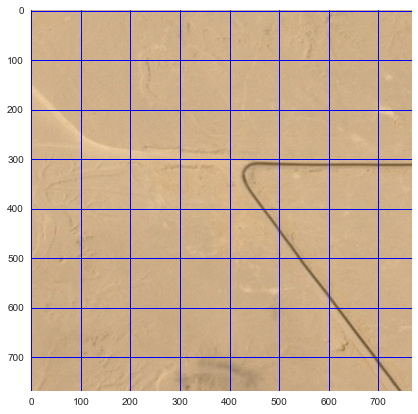

test_image_15.jpg  is desert


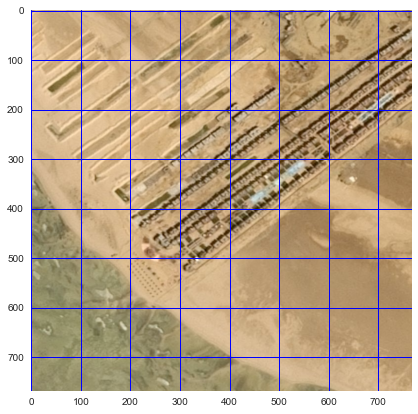

test_image_16.jpg  is desert


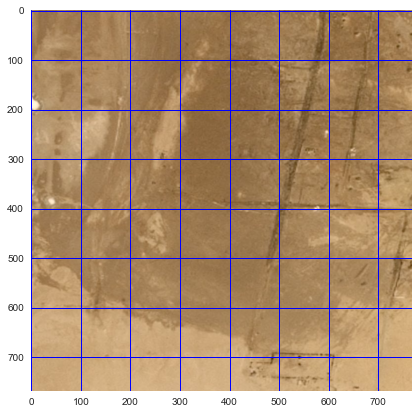

In [177]:
path = len([name for name in os.listdir('desert_forest/') if os.path.isfile(os.path.join('desert_forest/',name))])
for i in range(path):
    if i<10:
        st = f'0{i}'
    else:
        st = f'{i}'
    test_image = cv2.imread("desert_forest/test_image_"+st+f'.jpg')  # загрузить тестовую картинку
    test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)
    if (tree_or_desert(test_image)):
        print("test_image_"+st+f'.jpg', ' is desert')
    else:
        print("test_image_"+st+f'.jpg', ' is forest')
    plot_one_image(test_image)

# Задача №2 - Кусочки пазла.

Даны кусочки изображения, ваша задача склеить пазл в исходную картинку. 

Условия:
* Дано исходное изображение для проверки, использовать собранное изображение в самом алгоритме нельзя;
* Картинки имеют друг с другом пересечение;
* После разрезки кусочки пазлов не были повернуты или отражены;
* В качестве первого изображения, начиная с которого нужно собрать пазл, всегда принимается верхняя левая часть изображения;
* В процессе проверки решения пазлы могут быть перемешаны, т.е. порядок пазлов в проверке может отличаться от исходного 

Примеры изображений:
<img src="https://i.ibb.co/H78VtDb/image.jpg" alt="Drawing" style="width: 300px;"/>
<table><tr>
    <td> <img src="https://i.ibb.co/Yh1dvJ8/image_part_002.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/N9sCpjH/image_part_001.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/jf1jGgD/image_part_004.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/kBGYb8s/image_part_003.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [ ]:
# Ваш код

# Задача №3 - Найди клетки

Даны снимки раковых клеток. Существует задача - определить стадию рака клетки по такому изображению. Для того, чтобы подойти к решению классификации рака клетки, необходимо сначала подготовить данные.

Исходные изображения в реальных задачах могут быть очень большого размера (более 20000 px). Однако из визуального анализа можно заметить, что большая часть этих снимков пустая и не несет в себе полезную информацию.

Ваша задача выделить небольшие ячейки изображений из исходного так, чтобы на ячейках было только изображение клетки.

Пример исходного изображения и нарезанных ячеек клетки.
<img src="../img/cell_example.png" alt="Drawing" style="width: 500px;"/>

В качестве аргументов у функции будут значения:
1. исходное изображние;
2. размер ячейки;
3. количество ячеек.

__Доп вопрос__ - как можно выяснить какие нужны значения аргументов, чтобы они подходили для большинства исходных снимков?

In [ ]:
# Ваш код

In [356]:
def cel(image: np.ndarray):
    y = image.shape[0]
    x = image.shape[1]
    total = np.array
    flag = False
    deltay = 200 #y//21 #approximate dimensions of the rectangle we are considering
    deltax = 200 #x//16
    buf = np.array
    
    for k in range(0, y-deltay, deltay):
        for t in range(0, x-deltax, deltax):
            buf = image[k:k+deltay, t:t+deltax] #It could have been done through a mask
            color = ('r', 'g', 'b')
            check = np.array([False, False, False])
            for i, col in enumerate(color):
                hist, bins = np.histogram(buf[..., i].ravel(), 256, [0, 256])
                if hist[255] < 0.75*deltay*deltax: #0.75 it is %
                    check[i] = True
            if np.count_nonzero(check) > 1: #If more than one color is suitable, then it is a cage
                #plot_one_image(buf)
                if flag:
                    total = np.hstack([total, buf])
                else:
                    total = buf
                    flag = True
    return total

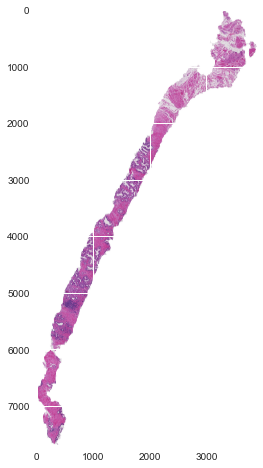

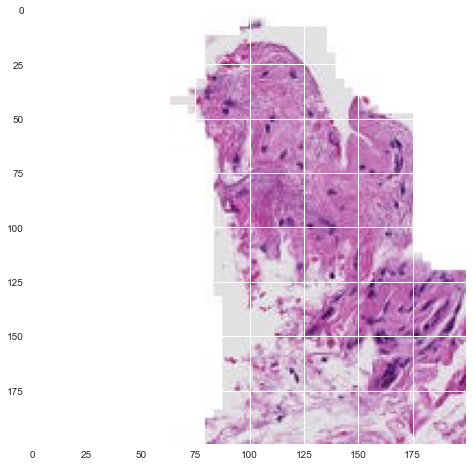

In [362]:
#I don't know how to represent all the images in one square, and not in a long rectangle
big = cv2.imread("cells/train2_1.jpeg")
big = cv2.cvtColor(big, cv2.COLOR_RGB2BGR)
plot_one_image(big)
final = cel(big)
plot_one_image(final)

In [344]:
print(final.shape)
print(big.shape)

(200, 19600, 3)
(7688, 3880, 3)
